# IPython Notebook to evaluate the observables output of our program

## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Import mcutils.py library to be found in project folder

In [2]:
from mcutils import *    #Documentation see mcutils.py

## Import and plot the observables as a function of Montecarlo steps

### Tune n_th to remove any effects of thermalisation. The HMC hamiltonian seems to be the clearest indicator for when thermalisation is completed

In [3]:
#n_th = 0
n_th = 1000

[['N', 'P', 'M', 'v0', 'beta', 'num_steps'], ['10', '200', '120', '2.000000e-01', '7.000000e-01', '200000']]


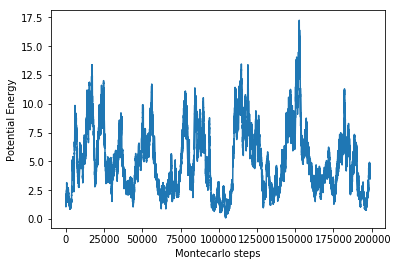

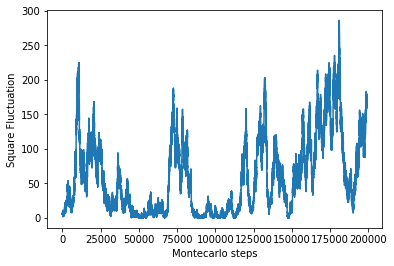

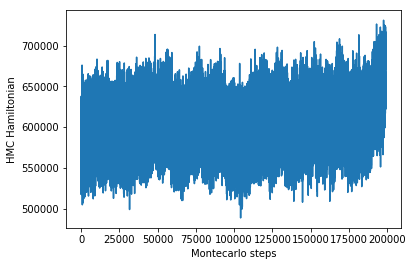

In [4]:
#obsfilePath = 'outputs/out_M_47_P_50.txt'    #As demanded in the exercise
obsfilePath = 'outputs/out_M_120_P_200.txt'   #N = 10, P = 200
obsData = importObsData(obsfilePath)
parameters = obsData[0]
obsData = obsData[1]
print(parameters)
noTherm = [obsData[1][n_th:],obsData[2][n_th:],obsData[3][n_th:]]
makePlot([np.arange(len(noTherm[0])),noTherm[0]], "Potential Energy")
makePlot([np.arange(len(noTherm[1])),noTherm[1]], "Square Fluctuation")
makePlot([np.arange(len(noTherm[2])),noTherm[2]], "HMC Hamiltonian")

## Plot histogram of the observables to check the distribution of values
### Each histogram is made of 100 equally-spaced bins

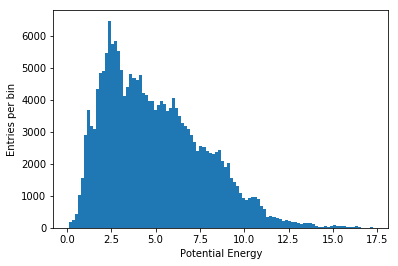

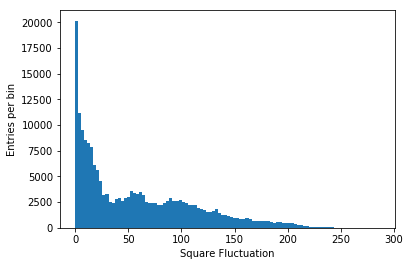

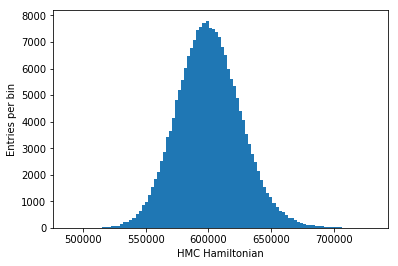

In [5]:
plt.hist(obsData[1][n_th:], 100)
plt.xlabel("Potential Energy")
plt.ylabel("Entries per bin")
plt.show()
plt.hist(obsData[2][n_th:], 100)
plt.xlabel("Square Fluctuation")
plt.ylabel("Entries per bin")
plt.show()
plt.hist(obsData[3][n_th:], 100)
plt.xlabel("HMC Hamiltonian")
plt.ylabel("Entries per bin")
plt.show()

## Calculate the autocorrelation with an exponential fit
### The autocorrelation time is rather large, so that a high value of k_max has to be chosen to provide acceptable precision. Results supplied in the array tau_results were calculated with the results from the file 'outputs/out_M_120_P_200.txt' with k_max = 100000 taking about 60 minutes each to calculate in python

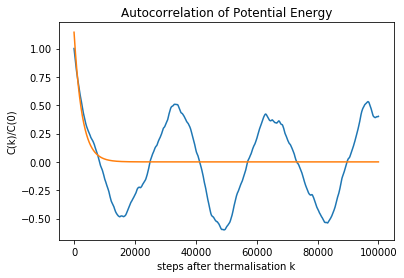

tau_exp: 2636 	 tau_int: 3093


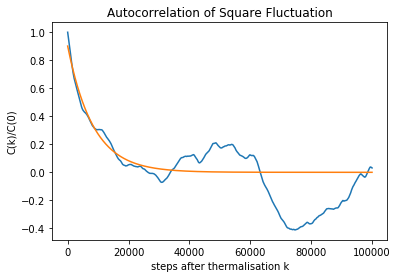

tau_exp: 8372 	 tau_int: 7091


In [6]:
autocorr_array, fitParams, tau_int = [],[],[]    #Empty lists to store results
k_max_tau_int = [10000, 25000]    #Sum cutoff value for integrated autocorrelation time
titles = ["Autocorrelation of Potential Energy", "Autocorrelation of Square Fluctuation"]
for i in [0,1]:
    k_max = 100000    #Maximum k to calculate autocorrelation up to
    autocorr_array.append(calc_autocorr(noTherm[i], k_max))    #Save autocorrelation
    fitParams.append(fit_autocorr_time(autocorr_array[i], k_max))    #Exponential fit to autocorr data
    tau_int.append(integrated_autocorr_time(autocorr_array[i][:k_max_tau_int[i]]))    #Calculate integrated autocorr time
    makeFitPlot(autocorr_array[i], k_max, fitParams[i][0], fitParams[i][1], titles[i])
    print("tau_exp: %.0f \t tau_int: %.0f"%(fitParams[i][1], tau_int[i]))

### The tail of negative autocorrelation is surprising. According to http://www.pmean.com/09/NegativeAutocorrelation.html it can indicate an oscillation of the observable around its average value meaning that if the value at step i is above average, step i+1 is likely to be below average. However as to be seen in the plots above the fluctuation around the average value seems to have a much longer duration than just one step
### Including the negative tail in the exponential fit does not significantly change the value of tau

## Please compare the results from the exponential fit and the integrated autocorrelation.
### To get significant results for the integrated autocorrelation the sum is stopped when C(k)/C(0) approaches zero for the first time. For the Potential energy this is at k $\approx$ 10000 and for the Square of the Fluctuation it is at k $\approx$ 25000.

In [7]:
tau_results_exp = [2636,8372]
tau_results_int = [3093,7091]

In [8]:
print("\t \t tau_exp \t tau_int")
print("Pot. E. \t %4.0f \t\t %04.0f"%(tau_results_exp[0], tau_results_int[0]))
print("Sq. Fluct. \t %4.0f \t\t %04.0f"%(tau_results_exp[1], tau_results_int[1]))

	 	 tau_exp 	 tau_int
Pot. E. 	 2636 		 2500
Sq. Fluct. 	 8372 		 2500


## Final result using the tau from the exponential fit
### The error is calculated according to $$err(X) = \frac{\sigma(X)}{\frac{N}{2\tau}}$$ with $\sigma(X)$ being the standard deviation of the observable in array X of length N

### This cell uses the results providid in tau_results...

In [9]:
print("Expectation value for the Potential Energy: %.2f +- %.2f"%(np.mean(noTherm[0]), np.std(noTherm[0])/np.sqrt(len(noTherm[0])/(2*tau_results_exp[0]))))
print("Expectation value for the Square Fluctuation: %.1f +- %.1f"%(np.mean(noTherm[1]), np.std(noTherm[1])/np.sqrt(len(noTherm[1])/(2*tau_results_exp[1]))))

Expectation value for the Potential Energy: 4.99 +- 0.45
Expectation value for the Square Fluctuation: 58.2 +- 15.7


### ...if you want to use your own calculations of tau, uncomment these lines

In [10]:
#print("Expectation value for the Potential Energy: %.2f +- %.2f"%(np.mean(noTherm[0]), np.std(noTherm[0])/np.sqrt(len(noTherm[0])/(2*fitParams[0][1]))))
#print("Expectation value for the Square Fluctuation: %.1f +- %.1f"%(np.mean(noTherm[1]), np.std(noTherm[1])/np.sqrt(len(noTherm[1])/(2*fitParams[1][1]))))